In [5]:
import numpy as np
from scipy.special import expit
from numpy import logaddexp
from glqp import GLQP,SolverSettings
from glqp.example_problems import build_random_logistic,build_logistic_lasso
import matplotlib.pyplot as plt
from scipy.sparse import csc_array,diags_array,csr_array,block_array
from numpy.random import default_rng

## Solve an inequality constrained logistic regression problem

In [6]:
f,A,Q,C,c,b = build_random_logistic(m = 10000,n = 500,k = 100,density=0.1, seed = 2)
problem = GLQP(f=f,A=A,Q=Q,b=b,C=C,c=c)
x,results = problem.solve()

────────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 500  │ Rows in A: 10,000 │ Equality Constraints: 0    │ Inequality Constraints: 100 
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  6.931e+05 │  1.84e+03 │  6.41e+00 │  2.97e+02 │  1.84e+03 │  1.1e+02 │ 3.5e-01 │ 3.5e-02 │      1 │   0.10s │ 7.5139e-15 │
│    2 │  6.984e+05 │  1.52e+03 │  5.11e+00 │  1.27e+03 │  1.52e+03 │  1.1e+02 │ 2.6e-01 │ 2.0e-01 │      1 │   0.17s │ 1.2319e-15 │
│    3 │  6.720e+05 │  1.04e+03 │  3.22e+00 │  8.75e+02 │  1.04e+03 │  9.7e+01 │ 4.0e-01 │ 3.7e-01 │      1 │   0.24s │ 1.1553e

## Solve an unconstrained logistic regression problem

In [7]:
problem = GLQP(f,A,Q,C=None,c=None,b=b)
x,results = problem.solve()

────────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 500  │ Rows in A: 10,000 │ Equality Constraints: 0    │ Inequality Constraints: 0   
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  6.931e+05 │  3.00e+02 │  0.00e+00 │  1.00e-12 │  3.00e+02 │  9.0e-13 │ 8.3e-01 │ 1.0e+00 │      1 │   0.15s │ 1.0861e-15 │
│    2 │  5.861e+05 │  2.74e+01 │  0.00e+00 │  9.00e-13 │  2.74e+01 │  8.1e-13 │ 2.1e-01 │ 1.0e+00 │      1 │   0.23s │ 1.3141e-15 │
│    3 │  5.826e+05 │  2.81e-01 │  0.00e+00 │  8.10e-13 │  2.81e-01 │  7.3e-13 │ 2.3e-02 │ 1.0e+00 │      1 │   0.29s │ 1.1911e

## Solve a large L1 regularized logistic regression

───────────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 5,000 │ Rows in A: 500,000 │ Equality Constraints: 0    │ Inequality Constraints: 5,000
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  3.466e+06 │  4.12e+03 │  0.00e+00 │  1.70e+05 │  1.70e+05 │  1.5e+05 │ 7.9e+01 │ 1.0e+00 │      1 │   6.69s │ 4.4923e-16 │
│    2 │  1.326e+07 │  1.13e+02 │  5.68e-14 │  2.10e+04 │  2.10e+04 │  1.5e+04 │ 6.8e+01 │ 9.7e-01 │      1 │  11.74s │ 1.2189e-16 │
│    3 │  2.180e+07 │  2.03e+01 │  1.14e-13 │  1.83e+04 │  1.83e+04 │  1.5e+03 │ 1.1e+02 │ 8.2e-01 │      1 │  16.86s │ 9

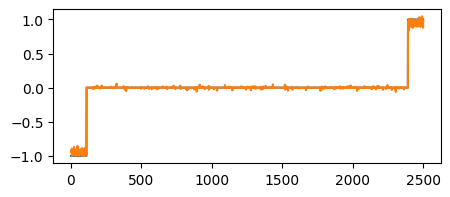

In [4]:
n = 2500
m = 500000
lam = 50.
f,A,Q,C,c,b,x_true = build_logistic_lasso(
    m = m,
    n = n, 
    seed = 2,
    lam = lam,
    weight = 10
    )
problem = GLQP(f=f,A=A,Q=Q,C=C,c=c,b = b)
xt,results = problem.solve(verbose = True)
x = xt[:n]

order = np.argsort(x_true)
plt.figure(figsize=(5,2))
plt.plot(x_true[order],label = 'true signal (sorted)')
plt.plot(x[order],label = 'l1 recovery')

## Solve a problem with both equality and inequality constraints
Also put some extra settings in

In [2]:
m = 50
n = 100
k = 10

f,A,Q,C,c,b = build_random_logistic(m = m,n = n,k = k,density=0.1, seed = 2)

rng = default_rng(10)
E = csr_array(rng.normal(size = (n//2,n)))
e = np.zeros(E.shape[0])


problem = GLQP(f,A,Q,b,C,c,E = E ,e = e)
settings = SolverSettings()
x,results = problem.solve(verbose = True,mu0 = 1.,settings = settings) 


──────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 100  │ Rows in A: 50   │ Equality Constraints: 50   │ Inequality Constraints: 10  
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  3.466e+03 │  1.37e+01 │  9.06e-01 │  7.06e+00 │  1.37e+01 │  3.3e-01 │ 1.5e+00 │ 6.6e-01 │      1 │   0.01s │ 6.5720e-16 │
│    2 │  3.373e+03 │  1.04e+00 │  4.89e-15 │  1.88e+00 │  1.88e+00 │  3.3e-02 │ 7.9e-01 │ 1.0e+00 │      1 │   0.02s │ 5.1562e-16 │
│    3 │  3.352e+03 │  3.61e-01 │  6.99e-15 │  8.46e-01 │  8.46e-01 │  1.4e+00 │ 1.7e+00 │ 6.7e-01 │      1 │   0.02s │ 8.6120e-15 

## Solve a problem with both equality and inequality constraints, where equality constraints are redundent

In [6]:
m = 50
n = 100
k = 10

f,A,Q,C,c,b = build_random_logistic(m = m,n = n,k = k,density=0.1, seed = 2)

rng = default_rng(10)
E = csr_array(np.vstack([np.ones(n)]*20))
e = np.zeros(E.shape[0])


problem = GLQP(f,A,Q,b,C,c,E = E ,e = e)

x,results = problem.solve(verbose = True,mu0 = 1.) 

──────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 100  │ Rows in A: 50   │ Equality Constraints: 20   │ Inequality Constraints: 10  
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  3.466e+03 │  2.61e+00 │  1.11e-15 │  3.73e+00 │  3.73e+00 │  1.0e-01 │ 2.2e+00 │ 1.0e+00 │      1 │   0.01s │ 8.0739e-16 │
│    2 │  3.333e+03 │  1.32e-01 │  4.33e-15 │  3.83e-02 │  1.32e-01 │  1.0e-02 │ 6.4e-01 │ 9.9e-01 │      1 │   0.02s │ 1.4592e-12 │
│    3 │  3.328e+03 │  1.75e-03 │  2.66e-15 │  4.82e-04 │  1.75e-03 │  1.0e-03 │ 4.5e+00 │ 9.9e-01 │      1 │   0.03s │ 2.2178e-10 

## Solve a linear system

──────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 100  │ Rows in A: 0    │ Equality Constraints: 0    │ Inequality Constraints: 0   
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  0.000e+00 │  9.95e-13 │  0.00e+00 │  1.00e-12 │  1.00e-12 │  1.0e-12 │ 2.0e+02 │ 1.0e+00 │      1 │   0.00s │ 1.9432e-13 │
Optimal solution after 1 iterations in 0.00s. Final maxnorm KKT residual: 1.00e-12.


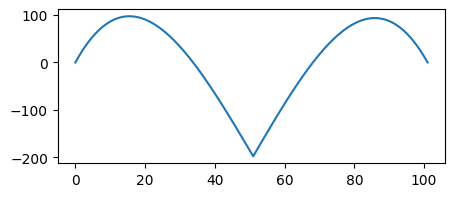

In [8]:
from scipy.sparse.linalg import LaplacianNd
n = 100
Q = -1 * LaplacianNd((n,),boundary_conditions = 'dirichlet').tosparse()
b = np.abs(np.linspace(-1,1,n))
b[n//2] -= 25
problem = GLQP(Q = Q,b = b)

x,results = problem.solve()
plt.figure(figsize=(5,2))
plt.plot(np.hstack([0,x,0]))
plt.show()

## Compare to CVXPY on large L1 problem

In [ ]:
n = 2500
m = 500000
lam = 100.
f,A,Q,C,c,b,x_true = build_logistic_lasso(m = m,n = n, seed = 2,lam = lam)
problem = GLQP(f,A,Q,b,C,c)
xt,results = problem.solve(verbose = True)
x = xt[:n]

order = np.argsort(x_true)
plt.figure(figsize=(5,2))
plt.plot(x_true[order],label = 'true signal (sorted)')
plt.plot(x[order],label = 'l1 recovery')

In [ ]:
import cvxpy as cp
from scipy.sparse import csc_array
A = csc_array(A)[:,:n]
n = A.shape[1]

beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
neg_log_likelihood = cp.sum(
    cp.multiply(f.w,cp.logistic(A @ beta)- cp.multiply(f.y, A @ beta))
)
regularization = lam*cp.norm1(beta)

problem  = cp.Problem(cp.Minimize(
    (neg_log_likelihood + regularization))
)
problem.solve(verbose = True)